In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline
plt.rcParams['figure.figsize'] = (32.0, 32.0)

import os
import time
from __future__ import absolute_import
from __future__ import print_function
from datetime import timedelta
import h5py

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0) # Set default figure size

In [0]:
TENSORBOARD_SUMMARIES_DIR = '/tmp/svhn_classifier_logs'

#### Loading Data .....
Reading the .h5 files
### Data fetching and understand the train/val/test splits.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import h5py
filename = "/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5"
h5 = h5py.File(filename,'r')
# Keys list (.h5 hierarchy ground level)
list(h5.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
X_test = h5.get('X_test')
X_test = np.array(X_test)

X_train = h5.get('X_train')
X_train = np.array(X_train)

X_val = h5.get('X_val')
X_val = np.array(X_val)

y_test = h5.get('y_test')
y_test = np.array(y_test)

y_train = h5.get('y_train')
y_train = np.array(y_train)

y_val = h5.get('y_val')
y_val = np.array(y_val)

In [6]:
X_train.shape

(42000, 32, 32)

In [0]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

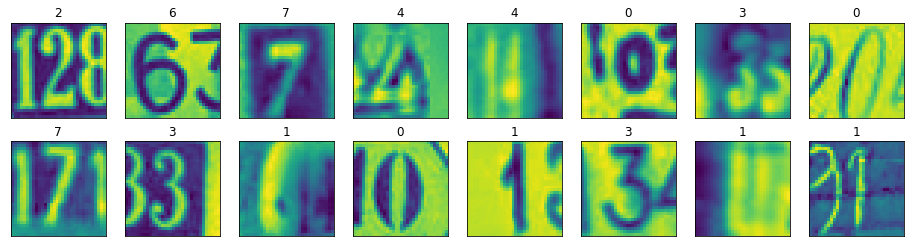

In [8]:
# Plot some training set images
plot_images(X_train, y_train, 2, 8)

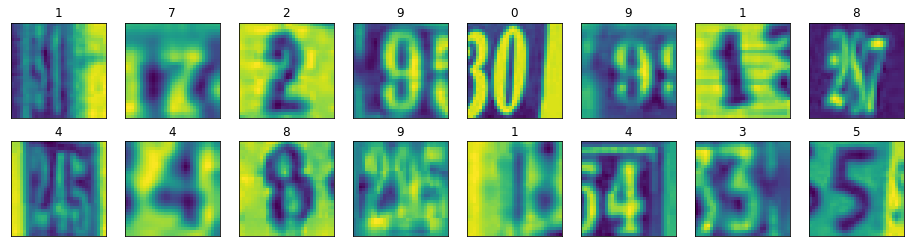

In [9]:
# Plot some test set images
plot_images(X_test, y_test, 2, 8)

In [10]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [11]:
# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Total Number of Images 60000


In [12]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)


(42000, 1024)


In [13]:
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(18000, 1024)


In [14]:
X_val = X_val.reshape(60000, 1024)
print(X_val.shape)

(60000, 1024)


### One Hot Label Encoding   
Apply One Hot Encoding to make label    
suitable for CNN Classification    

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [16]:
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (42000, 1024) (42000, 10)
Test Set (18000, 1024) (18000, 10)


### Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

In [0]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k

kVals = range(1, 30, 2)
accuracies = []

#### After running KNN on different k below were the accuracies :
k=1, accuracy=45.92%  
k=3, accuracy=37.84%  
k=5, accuracy=32.42%  
k=7, accuracy=28.68%  
k=9, accuracy=25.98%  
k=11, accuracy=23.62%  

(Ran it in seperate file as it takes very long time to execute every single model).    
Clearly, k=1 is optimum for this problem statement.

In [18]:
# train the k-Nearest Neighbor classifier with the current value of `k = 1`
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

# evaluate the model and update the accuracies list
score = model.score(X_val, y_val)
print("k=%d, accuracy=%.2f%%" % (1, score * 100))
accuracies.append(score)

k=1, accuracy=83.78%


In [19]:
print("k=1 achieved highest accuracy of 83.78% on validation data")

k=1 achieved highest accuracy of 83.78% on validation data


#### Making Predictions

In [0]:
predictions = model.predict(X_test)

In [21]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
           7       0.63      0.59      0.61      1808
           8       0.34      0.37      0.36      1812
           9       0.39      0.40      0.40      1804

   micro avg       0.46      0.46      0.46     18000
   macro avg       0.46      0.46      0.46     18000
weighted avg       0.46      0.46      0.46     18000
 samples avg       0.46      0.46      0.46     18000



### Print the classification metric report (2.5 points)

In [26]:
print ("Confusion matrix")
print(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)))

Confusion matrix
[[ 935   43   51   64   71   65  185   40  170  190]
 [  51 1034  109  122  123   69   68  119   67   66]
 [  63  135  872  131   82   74   65  168   79  134]
 [  67  166  127  610   88  229   82   80  149  121]
 [  85  195   51   71 1039   55  111   35   98   72]
 [  94  103   71  220   54  588  203   48  205  182]
 [ 225   74   51   72  102  154  711   33  295  115]
 [  65  173  146  100   34   38   48 1071   53   80]
 [ 150   62   59  130   86  153  267   44  675  186]
 [ 238   87   89  115   60  113  115   65  192  730]]


### Implement and apply a Deep Neural Network classifier including (feedforward neural network, RELU activations) (5 points)   
### Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)   
### Implement batch normalization for training the neural network (2.5 points)


In [27]:
#Importing Data Again
import h5py
filename = "/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5"
h5 = h5py.File(filename,'r')
# Keys list (.h5 hierarchy ground level)
list(h5.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
X_test = h5.get('X_test')
X_test = np.array(X_test)

X_train = h5.get('X_train')
X_train = np.array(X_train)

X_val = h5.get('X_val')
X_val = np.array(X_val)

y_test = h5.get('y_test')
y_test = np.array(y_test)

y_train = h5.get('y_train')
y_train = np.array(y_train)

y_val = h5.get('y_val')
y_val = np.array(y_val)

In [0]:
ytrain = tf.keras.utils.to_categorical(y_train, num_classes=10)
ytest = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [30]:
print("Training Set", X_train.shape, ytrain.shape)
print("Test Set", X_test.shape, ytest.shape)

Training Set (42000, 32, 32) (42000, 10)
Test Set (18000, 32, 32) (18000, 10)


Initialize model, reshape & normalize data

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Implementing batch normalization
model.add(tf.keras.layers.BatchNormalization())

In [32]:
#Adding First Fully Connected layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
#Add 2nd FC layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#Adding dropout layer
model.add(tf.keras.layers.Dropout(0.25))

In [0]:
# Adding Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [35]:
# Fit the model
model.fit(X_train ,ytrain,          
          validation_data=(X_test,ytest),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 175us/sample - loss: 1.8040 - acc: 0.3840 - val_loss: 1.2183 - val_acc: 0.6464
Epoch 2/10
42000/42000 [==============================] - 7s 157us/sample - loss: 1.2493 - acc: 0.6025 - val_loss: 0.9767 - val_acc: 0.7153
Epoch 3/10
42000/42000 [==============================] - 7s 158us/sample - loss: 1.0792 - acc: 0.6618 - val_loss: 0.9161 - val_acc: 0.7202
Epoch 4/10
42000/42000 [==============================] - 7s 157us/sample - loss: 0.9793 - acc: 0.6962 - val_loss: 0.8464 - val_acc: 0.7469
Epoch 5/10
42000/42000 [==============================] - 7s 166us/sample - loss: 0.9048 - acc: 0.7200 - val_loss: 0.7476 - val_acc: 0.7834
Epoch 6/10
42000/42000 [==============================] - 7s 160us/sample - loss: 0.8510 - acc: 0.7361 - val_loss: 0.7013 - val_acc: 0.7989
Epoch 7/10
42000/42000 [==============================] - 6s 155us/sample - loss: 0.8090 - acc: 0.7483 - val_l

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 230,206
Trainable params: 228,158
Non-trainable params: 2,048
______________________________________________

### Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

In [37]:
# Accuracy on Train Data
score = model.evaluate(X_train, ytrain, verbose=0)
score
print("The accuracy of train data is: ",score[1])

The accuracy of train data is:  0.8274286


In [38]:
# Accuracy on Test Data
score = model.evaluate(X_test, ytest, verbose=0)
score
print("The accuracy of test data is: ",score[1])

The accuracy of test data is:  0.7987222


In [0]:
y_predict = model.predict(X_test)

In [40]:
y_predict[0]

array([0.30833414, 0.06774718, 0.08109496, 0.02391341, 0.01076752,
       0.0202545 , 0.09659262, 0.05290217, 0.12132271, 0.21707079],
      dtype=float32)

In [41]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))

cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[1491   41   31   39   37    7   52   12   47   57]
 [  22 1511   34   36   55   11   29   44   68   18]
 [  14   35 1502   32   26   13    8   59   71   43]
 [  16   53   38 1248   24  156   29   31  102   22]
 [  24   68   38   15 1453   13   92    8   76   25]
 [  15   31   11  123   20 1420   65    9   53   21]
 [  37   34   22   39   63   63 1454    6  101   13]
 [  11   78   70   33   13   19   19 1498   32   35]
 [  24   55   35   75   41   46   85    2 1404   45]
 [  55   52   33   68   32   38   20   21   89 1396]]


In [42]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1814
           1       0.77      0.83      0.80      1828
           2       0.83      0.83      0.83      1803
           3       0.73      0.73      0.73      1719
           4       0.82      0.80      0.81      1812
           5       0.80      0.80      0.80      1768
           6       0.78      0.79      0.79      1832
           7       0.89      0.83      0.86      1808
           8       0.69      0.77      0.73      1812
           9       0.83      0.77      0.80      1804

    accuracy                           0.80     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.80      0.80      0.80     18000

